In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
data.shape

(30, 17)

In [4]:
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

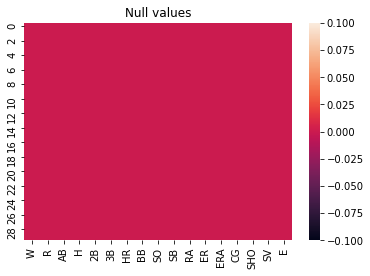

In [8]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [9]:
import warnings
warnings.filterwarnings('ignore')

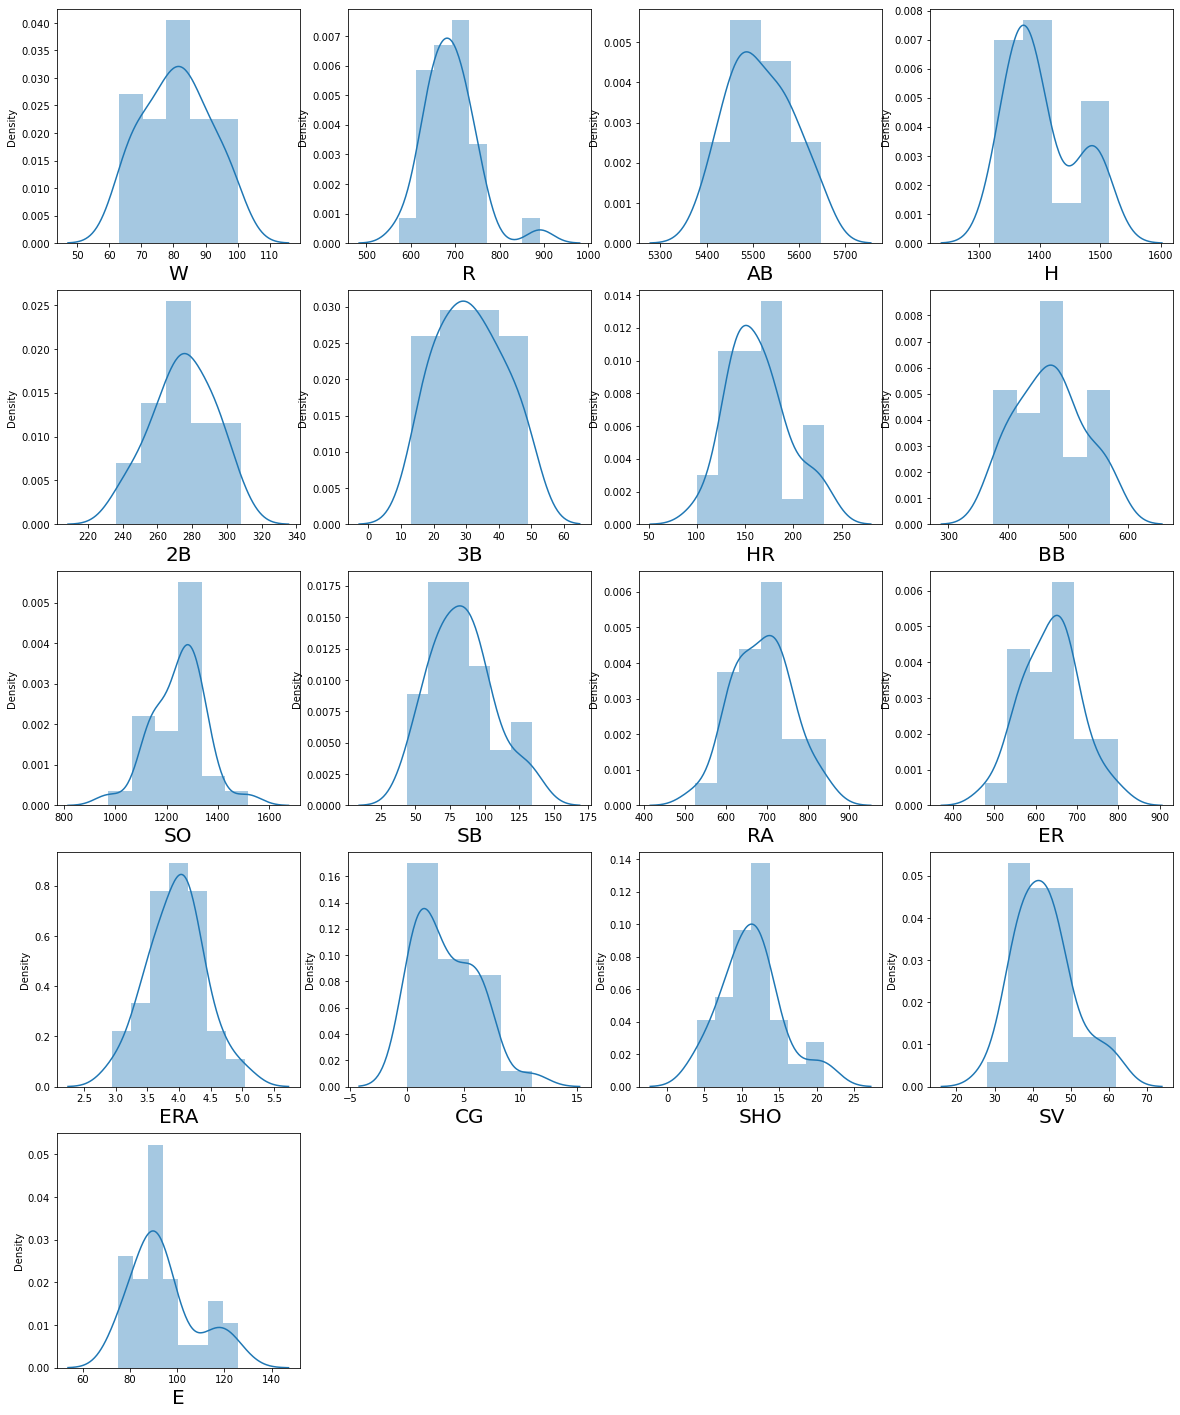

In [10]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [11]:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

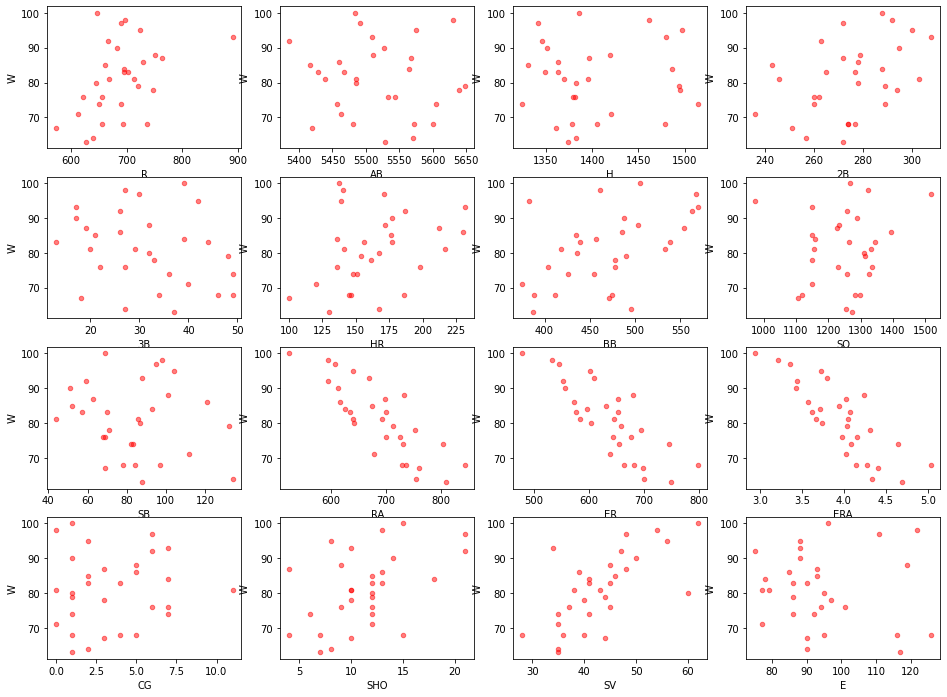

In [12]:
# setup figure
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='W', ax=ax, alpha=0.5, color='r')


from scatter plot it is seen that column AB , column 3B,column SB , column E shows scattered orientation which show very less dependancy over the target variable  so lets will drop that column in further steps,other column shown linear relationship with the target variables 

In [13]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

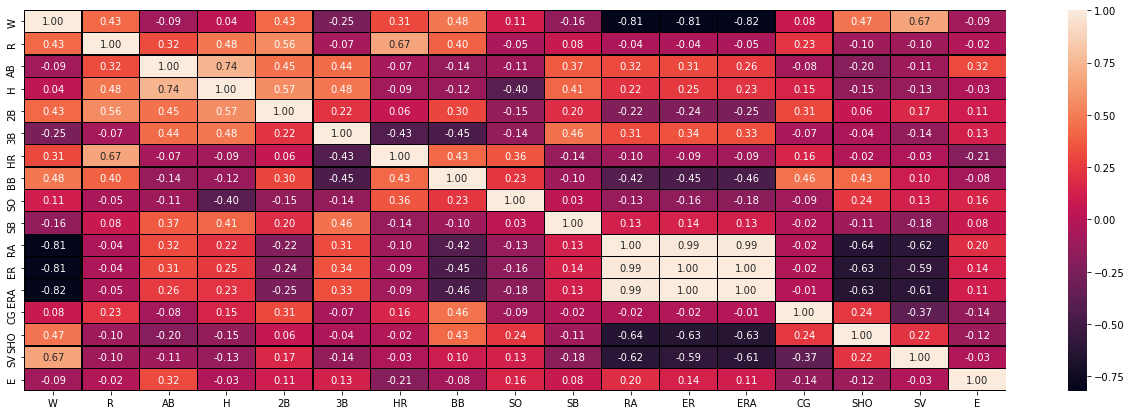

In [14]:
#heat map
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [15]:
data.drop(['AB','3B','SB','E'],axis=1,inplace=True)
data.head()

,W,R,H,2B,HR,BB,SO,RA,ER,ERA,CG,SHO,SV
0,95,724,1497,300,139,383,973,641,601,3.73,2,8,56
1,83,696,1349,277,156,439,1264,700,653,4.07,2,12,45
2,81,669,1395,303,141,533,1157,640,584,3.67,11,10,38
3,76,622,1381,260,136,404,1231,701,643,3.98,7,9,37
4,74,689,1515,289,151,455,1259,803,746,4.64,7,12,35


<AxesSubplot:>

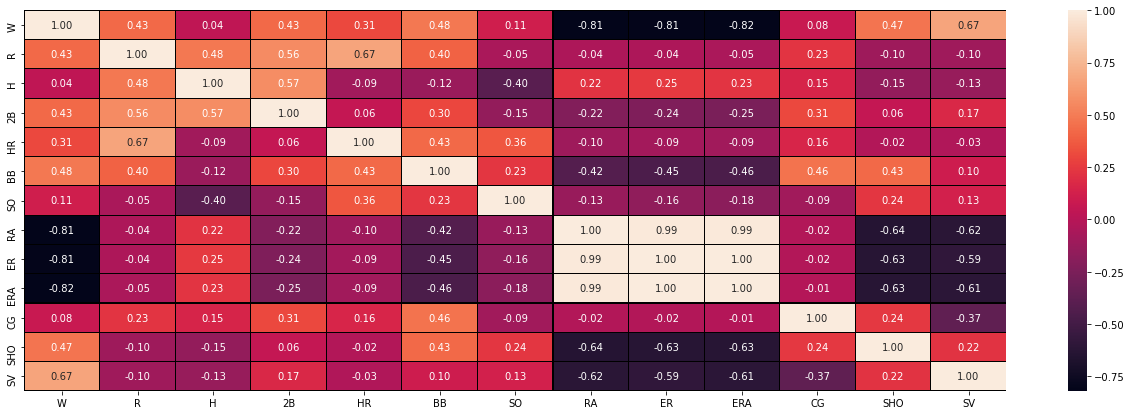

In [16]:
#heat map
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [17]:
data.describe()

,W,R,H,2B,HR,BB,SO,RA,ER,ERA,CG,SHO,SV
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,1403.533333,274.733333,163.633333,469.100000,1248.20000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667
std,10.453455,58.761754,57.140923,18.095405,31.823309,57.053725,103.75947,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335
min,63.000000,573.000000,1324.000000,236.000000,100.000000,375.000000,973.00000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000
25%,74.000000,651.250000,1363.000000,262.250000,140.250000,428.250000,1157.50000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000
50%,81.000000,689.000000,1382.500000,275.500000,158.500000,473.000000,1261.50000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000
75%,87.750000,718.250000,1451.500000,288.750000,177.000000,501.250000,1311.50000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000
max,100.000000,891.000000,1515.000000,308.000000,232.000000,570.000000,1518.00000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000


In [18]:
data.skew()

W      0.047089
R      1.200786
H      0.670254
2B    -0.230650
HR     0.516441
BB     0.158498
SO    -0.156065
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
dtype: float64

In [19]:
df_features=data.drop('W',axis=1)

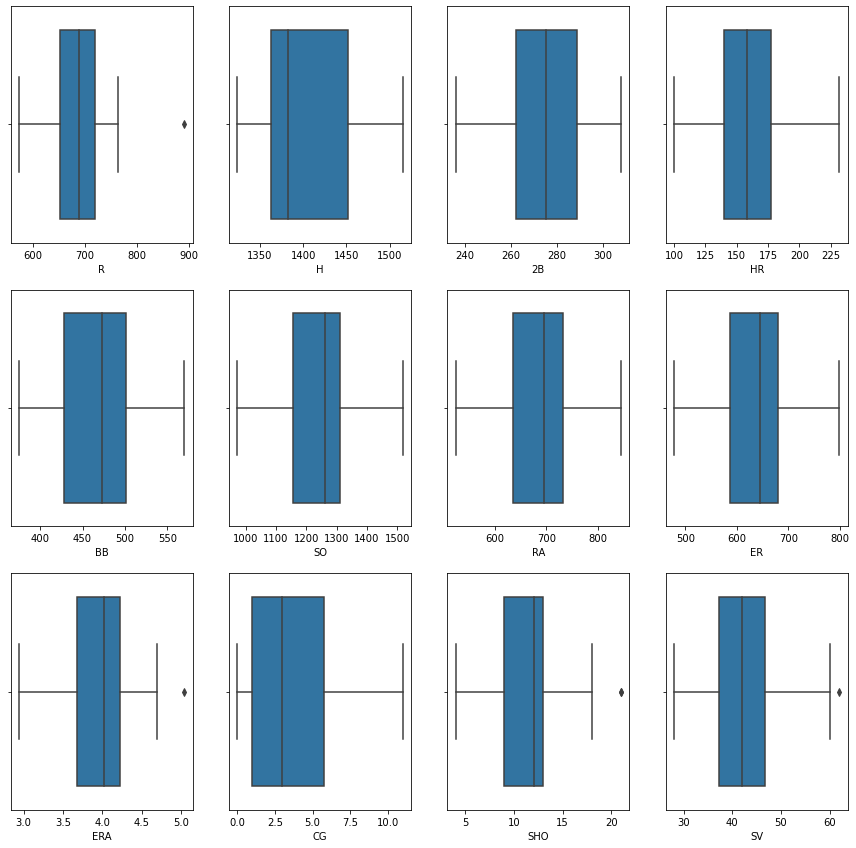

In [20]:
#visualize the outliers using boxplot
plt.figure(figsize=(15,20))
graph=1
for column in df_features:
    if graph<13:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(df_features[column],orient='V')
        plt.xlabel(column,fontsize=10)
        graph+=1
plt.show()        

In [21]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [22]:
data_new_z=data[(z<3).all(axis=1)]
data_new_z

,W,R,H,2B,HR,BB,SO,RA,ER,ERA,CG,SHO,SV
0,95,724,1497,300,139,383,973,641,601,3.73,2,8,56
1,83,696,1349,277,156,439,1264,700,653,4.07,2,12,45
2,81,669,1395,303,141,533,1157,640,584,3.67,11,10,38
3,76,622,1381,260,136,404,1231,701,643,3.98,7,9,37
4,74,689,1515,289,151,455,1259,803,746,4.64,7,12,35
6,87,764,1397,272,212,554,1227,698,652,4.03,3,4,48
7,81,713,1370,246,217,418,1331,693,646,4.05,0,10,43
8,80,644,1383,278,167,436,1310,642,604,3.74,1,12,60
9,78,748,1495,294,161,478,1148,753,694,4.31,3,10,40
10,88,751,1419,279,172,503,1233,733,680,4.24,5,9,45


In [23]:
data_new_z.shape

(29, 13)

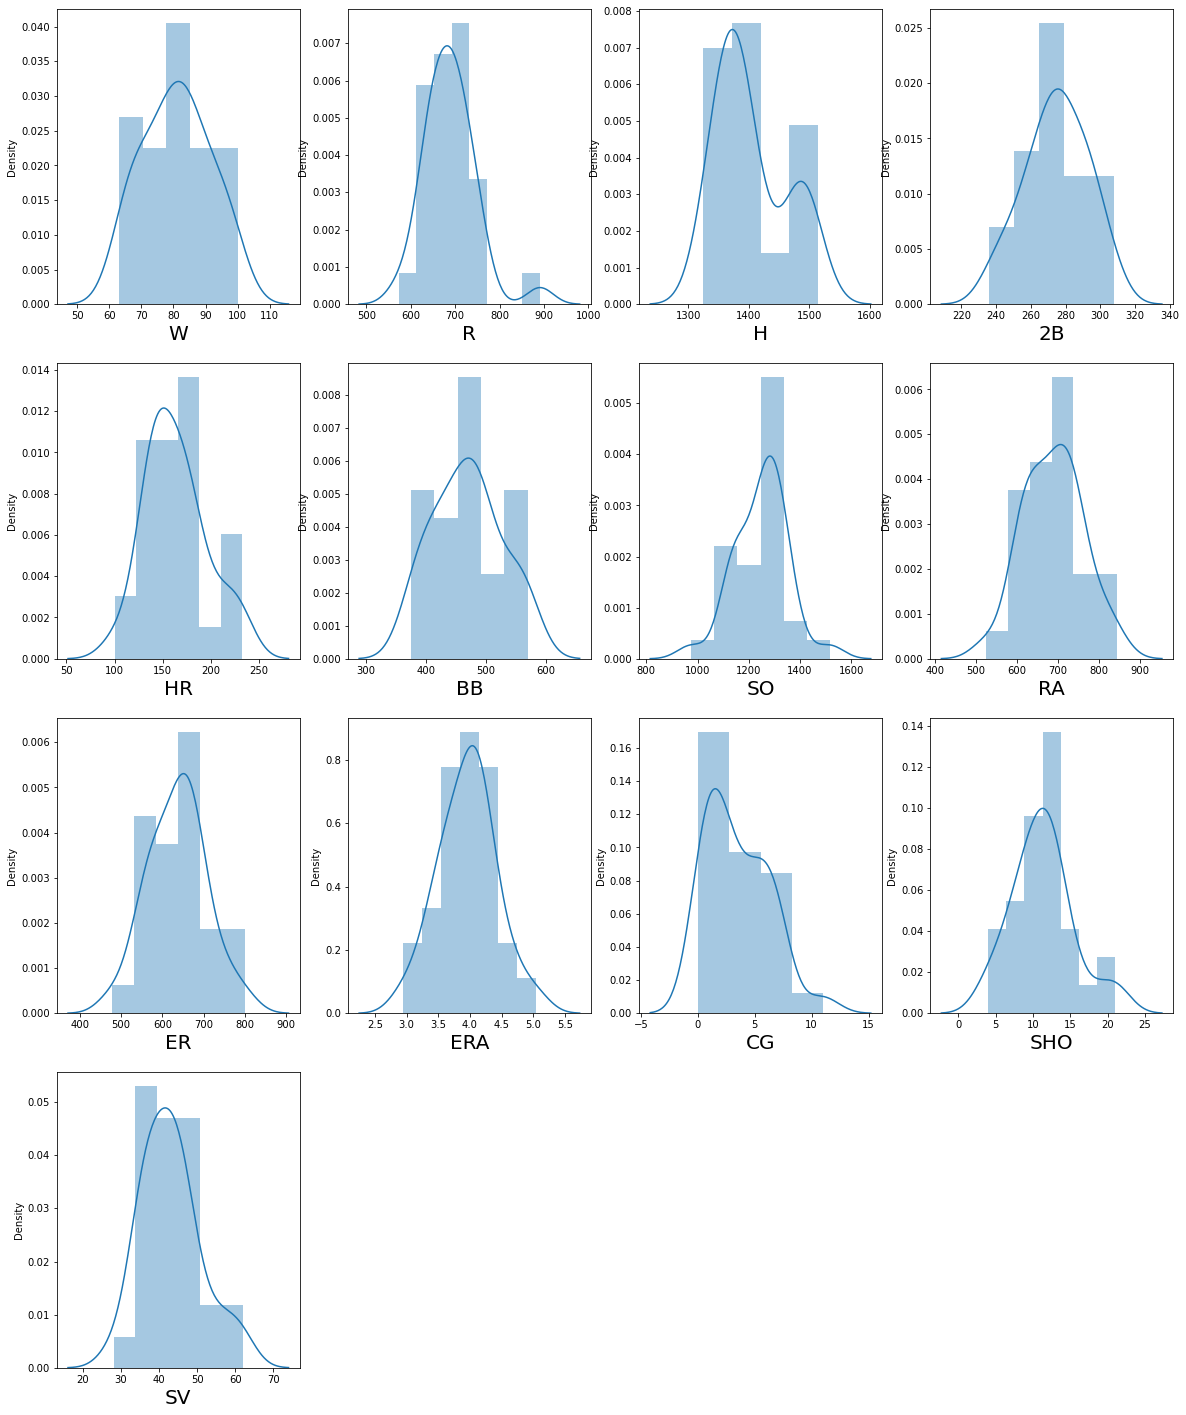

In [24]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [25]:
#devide data set into feature and label
y=data['W']
x=data.drop(['W'],axis=1)

In [27]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [28]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [29]:
x

,R,H,2B,HR,BB,SO,RA,ER,ERA,CG,SHO,SV
0,724,1497,300,139,383,973,641,601,3.73,2,8,56
1,696,1349,277,156,439,1264,700,653,4.07,2,12,45
2,669,1395,303,141,533,1157,640,584,3.67,11,10,38
3,622,1381,260,136,404,1231,701,643,3.98,7,9,37
4,689,1515,289,151,455,1259,803,746,4.64,7,12,35
5,891,1480,308,232,570,1151,670,609,3.80,7,10,34
6,764,1397,272,212,554,1227,698,652,4.03,3,4,48
7,713,1370,246,217,418,1331,693,646,4.05,0,10,43
8,644,1383,278,167,436,1310,642,604,3.74,1,12,60
9,748,1495,294,161,478,1148,753,694,4.31,3,10,40


In [30]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [32]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score correspond to random state  40 is -0.27307583072990593
R2 score correspond to random state  40 is 0.4752059074126671
R2 score correspond to random state  40 is 0.2910522754127792
R2 score correspond to random state  40 is 0.6329082812881556
R2 score correspond to random state  40 is 0.1292895045831518
R2 score correspond to random state  41 is 0.5989081810599742
R2 score correspond to random state  41 is 0.5676396997497914
R2 score correspond to random state  41 is 0.6907010050462927
R2 score correspond to random state  41 is 0.7628057400444745
R2 score correspond to random state  41 is 0.6274318453022276
R2 score correspond to random state  42 is 0.32555492316448487
R2 score correspond to random state  42 is 0.47626636311895265
R2 score correspond to random state  42 is 0.7767066654018845
R2 score correspond to random state  42 is 0.8200516498345718
R2 score correspond to random state  42 is 0.7543091658771671
R2 score correspond to random state  43 is -1.3756449948400413
R2 

In [29]:
#from sklearn.preprocessing import StandardScaler

In [44]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 0.61907797,  1.66368512,  1.42017307, -0.7872986 , -1.53490242,
        -2.69762957, -0.66623393, -0.50511008, -0.50695519, -0.5398062 ,
        -0.81462859,  1.67160651],
       [ 0.13443166, -0.97068076,  0.12740339, -0.24396668, -0.5365919 ,
         0.15487844,  0.16597077,  0.24892985,  0.25459752, -0.5398062 ,
         0.1728    ,  0.24987932],
       [-0.33290586, -0.15189137,  1.58879521, -0.7233772 ,  1.13914361,
        -0.89398189, -0.68033909, -0.75162313, -0.64134684,  2.77264091,
        -0.32091429, -0.65485616],
       [-1.14641931, -0.40108814, -0.82812203, -0.8831807 , -1.16053598,
        -0.16860185,  0.18007593,  0.10392217,  0.05301004,  1.3004422 ,
        -0.56777144, -0.78410408],
       [ 0.01327008,  1.98408098,  0.80189192, -0.40377019, -0.25136033,
         0.10586628,  1.61880269,  1.59750126,  1.53131824,  1.3004422 ,
         0.1728    , -1.04259994],
       [ 3.50964704,  1.36108904,  1.86983209,  2.18504658,  1.79874163,
        -0.95279649, -

# Model Building

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=45)

In [46]:
y_train.head()

24    63
6     87
22    71
23    67
18    68
Name: W, dtype: int64

In [47]:
#model instantiating and training
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [48]:
#predict the sales of given feature
data.tail(5)

,W,R,H,2B,HR,BB,SO,RA,ER,ERA,CG,SHO,SV
25,92,667,1346,263,187,563,1258,595,553,3.44,6,21,47
26,84,696,1486,288,136,457,1159,627,597,3.72,7,18,41
27,79,720,1494,289,154,490,1312,713,659,4.04,1,12,44
28,74,650,1324,260,148,426,1327,731,655,4.09,1,6,41
29,68,737,1479,274,186,388,1283,844,799,5.04,4,4,36


In [49]:
print(' W is:',regression.predict(scalar.transform([[667,1346,263,187,563,1258,595,553,3.44,6,21,47]])))

 W is: [88.93441042]


# Saving Model

In [50]:
#saving model to the local file system
filename='finalized_model_baseball_casestudy.pickle'
pickle.dump(regression,open(filename,'wb'))
#prediction using the saved model
Loaded_model=pickle.load(open(filename,'rb'))
a=Loaded_model.predict(scalar.transform([[737,1479,274,186,388,1283,844,799,5.04,4,4,36]]))
a

array([67.74822272])

In [51]:
#Adjusted R2 score
regression.score(x_train,y_train)

0.9339413248259116

In [52]:
#check how well model fits the test data
regression.score(x_test,y_test)

0.9482274522134272

In [53]:
#lets plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([98.27811908, 82.81920483, 88.93441042, 95.80638686, 79.51487004,
       80.37963433, 67.74822272, 81.20056006, 86.08065108, 65.70368271])

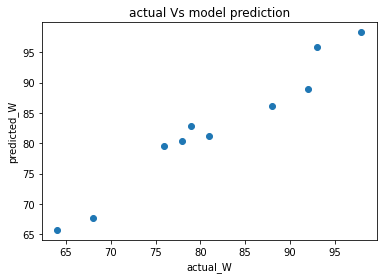

In [54]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual_W')
plt.ylabel('predicted_W')
plt.title('actual Vs model prediction')
plt.show()

# cross validation of model
regularization

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import Lasso
warnings.filterwarnings('ignore')

In [56]:
parameters={'alpha':[.0001,0.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [57]:
from sklearn.metrics import r2_score

In [58]:
ls=Lasso(alpha= 0.1,random_state= 0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9458793484633198